In [1]:
#!pip install git+https://github.com/Australian-Text-Analytics-Platform/quotation-tool.git@dbe8a9c23de7a7afffd72c00d2bcd7a838be649b

In [2]:
# just pathing - ignore this
import os
while  not 'juxtorpus' in os.listdir():
    os.chdir('../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

'Working directory: /Users/hcha9747/workspace/juxtorpus'

# Australian Text Analytics Platform (ATAP)
The Australian Text Analytics Platform aims to bring computational text analysis to the hands of students and researchers with little coding experience through easy to use widgets and library of functions on jupyter notebooks.

### 1. Create a Corpus and quick explore

In [3]:
import pandas as pd
from juxtorpus.corpus import Corpus

corpus = Corpus.from_dataframe(pd.read_excel('notebooks/workshops/ten_texts.xlsx'), col_doc='doc')

In [4]:
corpus.summary().T

,Name,Parent,Corpus Type,Number of Documents,Number of Total Words,Size of Vocabulary,mean Words per Document,min Words per Document,max Words per Document,metas
,sapphire-cuttlefish,,Corpus,10,2416,368,241,73,431,id


This corpus is relatively small in terms of the number of documents but the size of each individual document is much larger as compared to the dataset used in the concordance workshop.

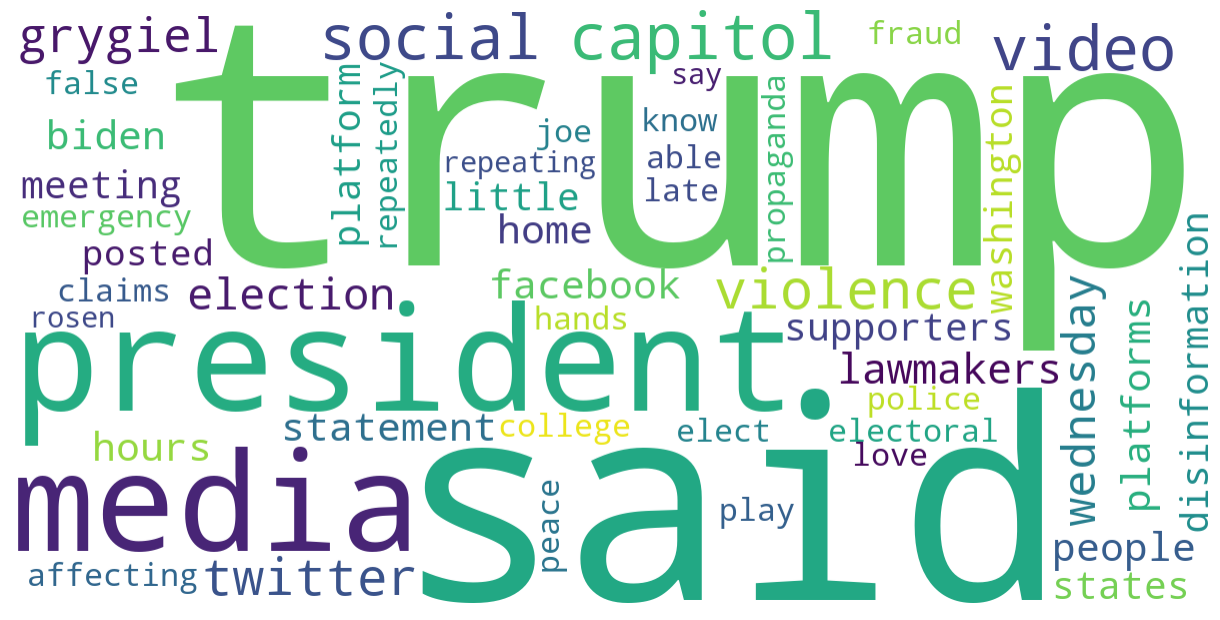

In [5]:
corpus.viz.wordcloud(metric='tf')

# Quotation Tool
Quotation tool can be used to **automatically extract quotes and the associated speaker**.

Let's load your `Corpus` into `QuotationTool`.

In [6]:
from quotation_tool import QuotationTool

qt = QuotationTool.from_corpus(corpus, doc_name_meta_id='id')   # requires metadata on document name.

[nltk_data] Downloading package punkt to /Users/hcha9747/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading spaCy language model...
This may take a while...
Finished loading.


In [7]:
qt.text_df.head(5)

,text,id,text_name,text_id
0,"Facebook and Instagram, which Facebook owns, f...",text1.txt,text1.txt,cef20ba91eb567643ce34d0caea6135a
1,(CBC News) Republican lawmakers and previous a...,text2.txt,text2.txt,c312b5e6b653788da60c24eba987c69c
2,Federated States of Micronesia President David...,text3.txt,text3.txt,61f0dfb97a832dcc1aaffed1383abeb0
3,"Facebook and Instagram, which Facebook owns, f...",text4.txt,text4.txt,6b6adcc54e31bab48c1e2af6b32e5ba5
4,(CBC News) Republican lawmakers and previous a...,text5.txt,text5.txt,6ed1621b9d14f4a8929ecc6db86aac68


In [8]:
inc_ent = ['ORG','PERSON','GPE','NORP','FAC','LOC']
qt.get_quotes(inc_ent)

Extracting quotes...
This may take a while...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 51.35it/s]


,text_id,text_name,quote_id,quote,quote_index,quote_entities,speaker,speaker_index,speaker_entities,verb,verb_index,quote_token_count,quote_type,is_floating_quote
0,cef20ba91eb567643ce34d0caea6135a,text1.txt,0,that Trump wouldn't be able to post for 24 hou...,"(84, 173)","[(Trump, PERSON)]","Facebook and Instagram, which Facebook owns","(0, 43)","[(Instagram, ORG)]",announcing,"(73, 83)",17,SVC,False
1,cef20ba91eb567643ce34d0caea6135a,text1.txt,1,that these actions follow years of hemming and...,"(275, 462)","[(Trump, PERSON)]",experts,"(261, 268)",[],noted,"(269, 274)",26,SVC,False
2,cef20ba91eb567643ce34d0caea6135a,text1.txt,2,"what happened in Washington, D.C., on Wednesda...","(565, 786)","[(D.C., GPE), (Trump, PERSON), (Washington, GPE)]","Jennifer Grygiel, a Syracuse University commun...","(464, 559)","[(Jennifer Grygiel, PERSON), (Syracuse Univers...",said,"(560, 564)",38,SVC,False
3,cef20ba91eb567643ce34d0caea6135a,text1.txt,3,This is what happens,"(984, 1004)",[],Grygiel,"(1007, 1014)","[(Grygiel, PERSON)]",said,"(1015, 1019)",4,QCQSV,False
4,cef20ba91eb567643ce34d0caea6135a,text1.txt,4,They're creeping along towards firmer action,"(1321, 1365)",[],Grygiel,"(1368, 1375)","[(Grygiel, PERSON)]",said,"(1376, 1380)",7,QCQSV,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,12d46565e56a05cac3aa9e22d5925c56,text10.txt,8,We can't play into the hands of these people,"(2951, 2995)",[],Trump,"(2928, 2933)","[(Trump, PERSON)]",say,"(2945, 2948)",10,SVC,False
72,12d46565e56a05cac3aa9e22d5925c56,text10.txt,9,We can't play into the hands of these people,"(3161, 3205)",[],Trump,"(3138, 3143)","[(Trump, PERSON)]",say,"(3155, 3158)",10,SVC,False
73,12d46565e56a05cac3aa9e22d5925c56,text10.txt,10,Our new MacBook is great,"(3290, 3314)",[],Apple,"(3277, 3282)","[(Apple, ORG)]",said,"(3283, 3287)",5,SVQCQ,False
74,12d46565e56a05cac3aa9e22d5925c56,text10.txt,11,"""We didn't just see a breach at the Capitol.So...","(1048, 1234)","[(the United States, GPE), (Capitol, ORG), (Ca...",Grygiel,"(1034, 1041)","[(Grygiel, PERSON)]",,"(0, 0)",38,QCQ,True


In [9]:
qt.analyse_entities(inc_ent)

In [10]:
from juxtorpus.corpus.processors import process
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
# nlp.add_pipe('extract_hashtags')
# nlp.add_pipe('extract_mentions')
nlp.add_pipe('spacytextblob')

In [11]:
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'spacytextblob']

In [12]:
from juxtorpus.corpus import Corpus
import pandas as pd
c = Corpus.from_dataframe(pd.read_csv('notebooks/demos/taster_workshop/twcs_sel.csv'), col_doc='text')
c = c.sample(100)
c.summary().T

,Name,Parent,Corpus Type,Number of Documents,Number of Total Words,Size of Vocabulary,mean Words per Document,min Words per Document,max Words per Document,metas
,wondrous-mongoose,savvy-locust,Corpus,100,1587,693,15,1,40,"tweet_id, author_id, inbound, created_at, resp..."


In [13]:
scorpus = process(c, nlp=nlp)

Spacy Corpus:   0%|          | 0/100 [00:00<?, ?it/s]

In [14]:
scorpus.summary().T

,Name,Parent,Corpus Type,Number of Documents,Number of Total Words,Size of Vocabulary,mean Words per Document,min Words per Document,max Words per Document,metas
,wondrous-mongoose,savvy-locust,SpacyCorpus,100,1587,693,15,1,40,"tweet_id, author_id, inbound, created_at, resp..."


In [15]:
scorpus.meta

{'tweet_id': <SeriesMeta [Id: tweet_id dtype: int64]>,
 'author_id': <SeriesMeta [Id: author_id dtype: object]>,
 'inbound': <SeriesMeta [Id: inbound dtype: bool]>,
 'created_at': <SeriesMeta [Id: created_at dtype: object]>,
 'response_tweet_id': <SeriesMeta [Id: response_tweet_id dtype: object]>,
 'in_response_to_tweet_id': <SeriesMeta [Id: in_response_to_tweet_id dtype: float64]>,
 'company': <SeriesMeta [Id: company dtype: object]>,
 'conversation': <SeriesMeta [Id: conversation dtype: int64]>,
 '.ents': <DocMeta [Id: .ents, Attribute: ents],
 '.sents': <DocMeta [Id: .sents, Attribute: sents],
 '.tensor': <DocMeta [Id: .tensor, Attribute: tensor],
 '._.blob': <DocMeta [Id: ._.blob, Attribute: blob],
 '._.polarity': <DocMeta [Id: ._.polarity, Attribute: polarity],
 'sentiment': <SeriesMeta [Id: sentiment dtype: float64]>,
 '._.subjectivity': <DocMeta [Id: ._.subjectivity, Attribute: subjectivity],
 '._.assessments': <DocMeta [Id: ._.assessments, Attribute: assessments]}

In [20]:
scorpus.meta['.sents'].head(5)

,text,.sents
0,@122130 The skies just haven't been the same w...,<generator object at 0x2aee200e0>
1,"@122522 Hi Michele, we're sorry you've not bee...",<generator object at 0x172e30720>
2,@SpotifyCares Did you remove the 1986 The Fly ...,<generator object at 0x172e7cae0>
3,@ComcastCares #mobile_Care 2nd night in a row ...,<generator object at 0x172e7c9a0>
4,@147970 Hi Abe. Do you have a case with us alr...,<generator object at 0x172d8a680>


In [16]:
scorpus.slicer.widget()

In [17]:
x = scorpus.slicer.filter_by_range('_polarity', min_=0.4)
x.docs().values

array([@British_Airways Can you kindly provide me with a BA Exec Club email address where I can send details of my &amp;my partner's move fromUS to Can,
       @181921 We are here 24/7 with any issue or concern you may have. Please DM us with your information and we will be more than happy to assist you.-RM,
       @278811 I understand your frustration and I'll be happy to assist with your internet speed issue. Please send a DM with your full name, address, and account number so I can look into your concerns. Thanks! -KW,
       @331623 Hi Paula. I apologize that you have been experiencing issues with your service, and I am happy to look into this for you. Can you send a DM with your full address and the phone number registered to your account, so I can verify your account and assist? - Noah,
       @342447 We're showing your flight was cancelled due to air traffic congestion. We do our best to get you where you need to be on time.,
       @AmericanAir That certainly is a valid reason 

In [18]:
scorpus[0]

@122130 The skies just haven't been the same without you. We're looking forward to seeing you on board soon!

In [19]:
scorpus.meta['._.mentions'].head(1)

KeyError: '._.mentions'

In [ ]:
scorpus.to_dataframe()

In [ ]:
meta = scorpus.meta.get('._.polarity')
meta._get_doc_attr(scorpus[0])

In [ ]:
scorpus[0]._.blob.sentiment

In [ ]:
scorpus.to_dataframe().loc[5406, '._.polarity']

In [ ]:
scorpus[0]._.polarity

In [ ]:
scorpus.to_dataframe().loc[5406, 'document']._.polarity

In [ ]:
from juxtorpus.corpus.topic_model import LDA

lda = LDA(scorpus, 10)
lda.build(mode='tf')
lda.add_results_to_corpus()
lda.widget()